In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Cleaned_Data.csv')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}

Evaluation Metrics:
Accuracy: 0.8701
Precision: 0.75
Recall: 0.2911
F1-score: 0.4195
ROC-AUC: 0.8151

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1233
           1       0.75      0.29      0.42       237

    accuracy                           0.87      1470
   macro avg       0.81      0.64      0.67      1470
weighted avg       0.86      0.87      0.85      1470



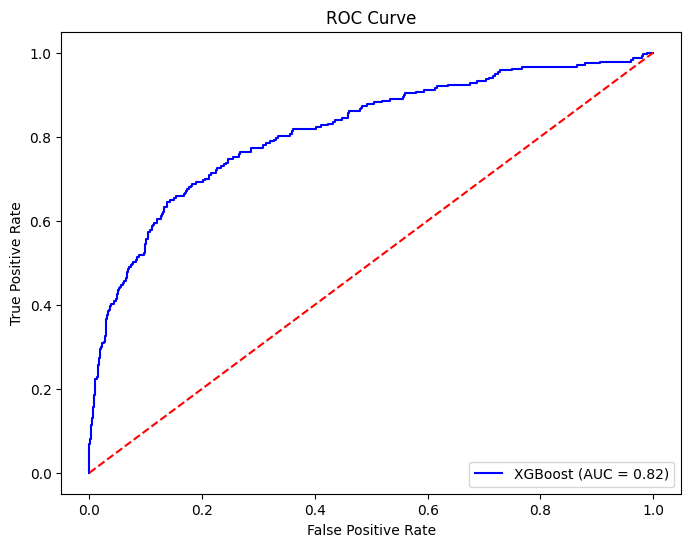

In [26]:
from sklearn.model_selection import KFold,GridSearchCV,cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,roc_curve,auc
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}
X = df.drop('Attrition', axis=1)
y = df['Attrition']
kf=KFold(n_splits=5, shuffle=True, random_state=42)
grid_search=GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=kf,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model,X,y,cv=kf)
y_pred1 = cross_val_predict(best_model,X,y,cv=kf,method='predict_proba')[:, 1]

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred1)

print("\nEvaluation Metrics:")
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))

print("\nClassification Report:\n", classification_report(y, y_pred))

fpr,tpr,thresholds=roc_curve(y,y_pred1)
roc_auc_val=auc(fpr,tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',label='XGBoost (AUC = %.2f)' % roc_auc_val)
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

